In [1]:
import numpy as np
import pandas as pd
data = np.asarray(pd.read_csv('data_train_edge.csv', header=None))
data2 = np.asarray(pd.read_csv('predict.csv', header=None))
data = np.delete(data,(0), axis = 0)
data2 = np.delete(data2,(0), axis = 0)
print(data2[0:50])
print(len(data))

[['0' '223']
 ['0' '721']
 ['0' '457']
 ['0' '222']
 ['0' '250']
 ['0' '975']
 ['0' '6']
 ['0' '221']
 ['0' '920']
 ['0' '178']
 ['1' '47']
 ['1' '302']
 ['1' '31']
 ['1' '633']
 ['1' '150']
 ['1' '221']
 ['1' '868']
 ['1' '103']
 ['2' '886']
 ['2' '193']
 ['2' '249']
 ['2' '756']
 ['2' '587']
 ['2' '286']
 ['2' '6']
 ['2' '162']
 ['2' '174']
 ['2' '896']
 ['2' '283']
 ['2' '865']
 ['2' '36']
 ['2' '875']
 ['2' '37']
 ['2' '902']
 ['2' '3']
 ['2' '89']
 ['2' '22']
 ['2' '209']
 ['2' '208']
 ['2' '281']
 ['2' '665']
 ['2' '96']
 ['2' '57']
 ['2' '408']
 ['3' '46']
 ['3' '33']
 ['3' '396']
 ['3' '101']
 ['3' '102']
 ['3' '236']]
20457


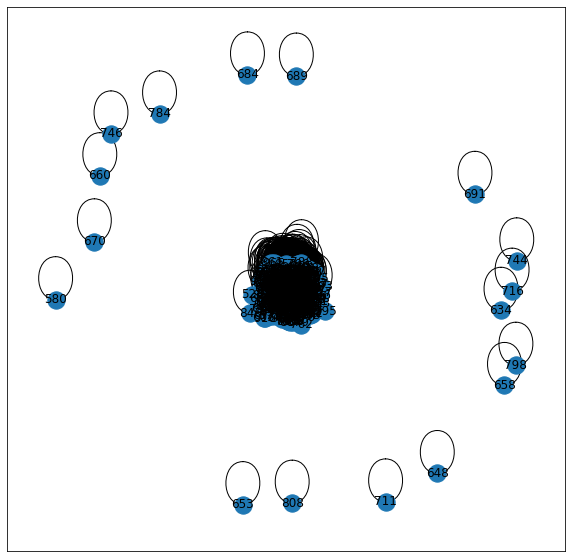

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from(data)
  
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True)

In [3]:
record  = np.zeros((20457,1), dtype=float)
for i in range (len(data)):
  common_nbor = len(set([n for n in G.neighbors(data[i][0])]).intersection(set([n for n in G.neighbors(data[i][1])])))
  record[i] = common_nbor


In [4]:
print(record[0:500])

[[  5.]
 [ 14.]
 [ 18.]
 [ 17.]
 [ 10.]
 [ 11.]
 [  5.]
 [ 19.]
 [ 11.]
 [ 16.]
 [ 10.]
 [ 16.]
 [  9.]
 [ 13.]
 [ 12.]
 [ 21.]
 [ 17.]
 [ 36.]
 [ 12.]
 [  5.]
 [  9.]
 [  5.]
 [  7.]
 [ 12.]
 [ 21.]
 [ 14.]
 [ 16.]
 [ 38.]
 [ 41.]
 [ 38.]
 [ 47.]
 [ 23.]
 [ 41.]
 [ 33.]
 [ 18.]
 [ 14.]
 [ 41.]
 [ 33.]
 [ 37.]
 [ 32.]
 [ 42.]
 [ 28.]
 [ 20.]
 [ 25.]
 [  8.]
 [ 26.]
 [ 30.]
 [ 17.]
 [ 27.]
 [  9.]
 [ 32.]
 [ 23.]
 [ 58.]
 [  9.]
 [ 44.]
 [  9.]
 [ 37.]
 [  7.]
 [ 27.]
 [ 17.]
 [  8.]
 [ 45.]
 [ 12.]
 [ 24.]
 [ 27.]
 [ 41.]
 [ 37.]
 [ 43.]
 [ 41.]
 [ 22.]
 [ 12.]
 [ 18.]
 [ 25.]
 [ 40.]
 [ 33.]
 [ 15.]
 [ 39.]
 [ 39.]
 [ 33.]
 [  6.]
 [  9.]
 [ 25.]
 [ 11.]
 [ 87.]
 [ 12.]
 [ 23.]
 [ 16.]
 [ 13.]
 [ 37.]
 [ 29.]
 [ 32.]
 [ 26.]
 [ 58.]
 [ 44.]
 [ 18.]
 [  7.]
 [ 29.]
 [ 21.]
 [ 39.]
 [ 26.]
 [ 31.]
 [ 48.]
 [ 26.]
 [ 24.]
 [ 15.]
 [ 31.]
 [ 29.]
 [ 18.]
 [ 20.]
 [ 18.]
 [  6.]
 [ 21.]
 [  9.]
 [ 27.]
 [ 27.]
 [ 27.]
 [  9.]
 [  2.]
 [ 49.]
 [ 29.]
 [  9.]
 [ 41.]
 [ 19.]
 [ 24.]
 [ 35.]


In [5]:
record = np.asarray(record, dtype = int)

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(data, record)
y_pred = model.predict(data2)

In [7]:
y_pred[0:500]

array([18, 29, 27, 16, 20,  9,  5, 11,  7, 17, 13, 15, 14,  3, 16, 11,  1,
        9,  7, 25, 27, 29,  9, 27, 39, 44, 33,  8, 25,  8,  7,  1,  7,  8,
       47, 24, 24, 28, 28, 37, 18, 26, 41, 41, 20, 10, 27,  5,  9, 17, 10,
       29, 15,  2, 47,  1, 19, 17,  8, 51,  4, 25,  4, 12, 29, 29, 22, 36,
       24, 22,  6, 35,  5, 27, 53, 23,  4, 13, 31, 33, 29, 30, 31, 22, 25,
        7,  8, 12, 20,  1,  8,  8, 70, 18, 31, 33, 28,  8, 33, 15, 26,  8,
        9, 61, 14,  6,  1, 36,  6, 17, 44, 40,  4,  8,  6,  4, 19, 12, 38,
       16,  9, 11, 13, 11,  9, 44, 51, 17, 15, 21, 31, 13, 45, 39,  4, 14,
       24, 32, 12, 10, 20, 13, 42,  8, 28,  4,  7,  7, 30, 28,  9, 45,  4,
       20,  5, 22, 14, 10, 26, 21, 12, 22, 24, 11, 33, 28,  1,  7, 13, 10,
       12, 11, 17, 18, 14, 13, 18,  4, 25,  3, 22,  5,  9, 11, 18,  4, 19,
       18, 16, 13,  3,  8, 10, 22, 21, 20, 24, 14,  9,  5, 19, 11,  6, 14,
       14,  8,  7,  8,  6, 20, 23,  3, 11, 17, 65, 10,  5, 13, 18, 65, 20,
       13,  7, 10,  4, 14

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
#naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
#svm_mod = SVC()

#naive_bayes.fit(data, record)
bag_mod.fit(data, record)
rf_mod.fit(data, record)
ada_mod.fit(data, record)
#svm_mod.fit(data, record)


#preds_nb = naive_bayes.predict(data2)
preds_bag = bag_mod.predict(data2)
preds_rf = rf_mod.predict(data2)
preds_ada = ada_mod.predict(data2)
#preds_svm = svm_mod.predict(data2)
#print(preds_nb)
print(preds_bag)
print(preds_rf)
print(preds_ada)
#print(preds_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
